<a href="https://colab.research.google.com/github/alexandergribenchenko/Data_Science_Toolkit/blob/main/EDA/DS_EDA_02_NB_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapas EDA
1. Valores nulos
2. Exploración Variables Numericas
3. Exploración Variables categoricas
4. Relacion entre variables

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

In [ ]:
path_github = 'https://raw.githubusercontent.com/alexandergribenchenko/Data_Science_Datasets/main/CSV_files/fraud.csv'

In [ ]:
df_raw = pd.read_csv(path_github)
df_raw .head(5)

,Monthh,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Yearr,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [ ]:
dict_replace = {}
dict_replace['Monthh'] = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
                          'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
dict_replace['MonthClaimed'] = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6,
                          'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}              
dict_replace['DayOfWeek'] = {'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 
                             'Friday':5, 'Saturday':6, 'Sunday':7}
dict_replace

{'Monthh': {'Jan': 1,
  'Feb': 2,
  'Mar': 3,
  'Apr': 4,
  'May': 5,
  'Jun': 6,
  'Jul': 7,
  'Aug': 8,
  'Sep': 9,
  'Oct': 10,
  'Nov': 11,
  'Dec': 12},
 'MonthClaimed': {'Jan': 1,
  'Feb': 2,
  'Mar': 3,
  'Apr': 4,
  'May': 5,
  'Jun': 6,
  'Jul': 7,
  'Aug': 8,
  'Sep': 9,
  'Oct': 10,
  'Nov': 11,
  'Dec': 12},
 'DayOfWeek': {'Monday': 1,
  'Tuesday': 2,
  'Wednesday': 3,
  'Thursday': 4,
  'Friday': 5,
  'Saturday': 6,
  'Sunday': 7}}

In [ ]:
df= df_raw.replace(dict_replace)
df

,Monthh,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Yearr,BasePolicy
0,12,5,3,Honda,Urban,Tuesday,1,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,1,3,3,Honda,Urban,Monday,1,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,10,5,5,Honda,Urban,Thursday,11,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,6,2,6,Toyota,Rural,Friday,7,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,1,5,1,Honda,Urban,Tuesday,2,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,11,4,5,Toyota,Urban,Tuesday,11,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,11,5,4,Pontiac,Urban,Friday,12,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,11,5,4,Toyota,Rural,Friday,12,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,12,1,1,Toyota,Urban,Thursday,12,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Monthh                15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Yearr
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [ ]:
df.describe(include='O')

,Monthh,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,3,6,5,4,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,more than 30,more than 30,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,9671,8079,15247,15342,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


# 01. Valores nulos

In [ ]:
df.shape

(15420, 33)

In [ ]:
df.isnull().sum()

Monthh                  0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Yearr                   0
BasePolicy              0
dtype: int64

In [ ]:
cols_with_null_values = [feature for feature in df.columns if df[feature].isnull().sum()>0]
cols_with_null_values

[]

In [ ]:
  cols = list(df.columns)
  cols

['Monthh',
 'WeekOfMonth',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Age',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'FraudFound_P',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Yearr',
 'BasePolicy']

In [ ]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Yearr
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [ ]:
df.shape[0]

15420

In [ ]:
x=[1,2]
len(x)

2

In [ ]:
df.groupby(['Monthh'], as_index=False).\
           agg(count=('Monthh', 'count'),
               percentaje=('Monthh', lambda x: round(100*len(x)/df.shape[0],2))).\
           sort_values(by='Monthh', ascending=True)

,Monthh,count,percentaje
0,1,1411,9.15
1,2,1266,8.21
2,3,1360,8.82
3,4,1280,8.30
4,5,1367,8.87
5,6,1321,8.57
6,7,1257,8.15
7,8,1127,7.31
8,9,1240,8.04
9,10,1305,8.46


In [ ]:
columna_interes = 'Monthh'
df.groupby([columna_interes], as_index=False).\
           agg(count=(columna_interes, 'count'),
               percentaje=(columna_interes, lambda x: round(100*len(x)/df.shape[0],2)), 
               total=(columna_interes, lambda x: df.shape[0]), 
               promedio=(columna_interes, lambda x: df.shape[0]/df[columna_interes].nunique())
               ).\
           sort_values(by=columna_interes, ascending=True)

,Monthh,count,percentaje,total,promedio
0,1,1411,9.15,15420,1285.0
1,2,1266,8.21,15420,1285.0
2,3,1360,8.82,15420,1285.0
3,4,1280,8.30,15420,1285.0
4,5,1367,8.87,15420,1285.0
5,6,1321,8.57,15420,1285.0
6,7,1257,8.15,15420,1285.0
7,8,1127,7.31,15420,1285.0
8,9,1240,8.04,15420,1285.0
9,10,1305,8.46,15420,1285.0


In [ ]:
columna_interes = 'DayOfWeek'
df.groupby([columna_interes], as_index=False).\
           agg(count=(columna_interes, 'count'),
               percentaje=(columna_interes, lambda x: round(100*len(x)/df.shape[0],2)), 
               total=(columna_interes, lambda x: df.shape[0]), 
               promedio=(columna_interes, lambda x: df.shape[0]/df[columna_interes].nunique())
               ).\
           sort_values(by=columna_interes, ascending=True)

,DayOfWeek,count,percentaje,total,promedio
0,1,2616,16.96,15420,2202.857143
1,2,2300,14.92,15420,2202.857143
2,3,2159,14.00,15420,2202.857143
3,4,2173,14.09,15420,2202.857143
4,5,2445,15.86,15420,2202.857143
5,6,1982,12.85,15420,2202.857143
6,7,1745,11.32,15420,2202.857143


In [ ]:
columna_interes = 'FraudFound_P'
df.groupby([columna_interes], as_index=False).\
           agg(count=(columna_interes, 'count'),
               percentaje=(columna_interes, lambda x: round(100*len(x)/df.shape[0],2)), 
               total=(columna_interes, lambda x: df.shape[0]), 
               promedio=(columna_interes, lambda x: df.shape[0]/df[columna_interes].nunique())
               ).\
           sort_values(by=columna_interes, ascending=True)

,FraudFound_P,count,percentaje,total,promedio
0,0,14497,94.01,15420,7710.0
1,1,923,5.99,15420,7710.0


In [ ]:
columna_interes = 'MonthClaimed'
df.groupby([columna_interes], as_index=False).\
           agg(count=(columna_interes, 'count'),
               percentaje=(columna_interes, lambda x: round(100*len(x)/df.shape[0],2)), 
               total=(columna_interes, lambda x: df.shape[0]), 
               promedio=(columna_interes, lambda x: df.shape[0]/df[columna_interes].nunique())
               ).\
           sort_values(by=columna_interes, ascending=True)

TypeError: ignored

In [ ]:
columna_Interes = 'Monthh'
df.groupby(['Monthh'], as_index=False).\
           agg(count=('Monthh', 'count'),
               percentaje=('Monthh', lambda x: round(100*len(x)/df.shape[0],2)), 
               total=('Monthh', lambda x: df.shape[0]), 
               promedio=('Monthh', lambda x: df.shape[0]/df['Monthh'].nunique())
               ).\
           sort_values(by='Monthh', ascending=True)

,Monthh,count,percentaje,total,promedio
0,1,1411,9.15,15420,1285.0
1,2,1266,8.21,15420,1285.0
2,3,1360,8.82,15420,1285.0
3,4,1280,8.30,15420,1285.0
4,5,1367,8.87,15420,1285.0
5,6,1321,8.57,15420,1285.0
6,7,1257,8.15,15420,1285.0
7,8,1127,7.31,15420,1285.0
8,9,1240,8.04,15420,1285.0
9,10,1305,8.46,15420,1285.0


In [ ]:
df.groupby(['DayOfWeek'], as_index=False).\
           agg(count=('DayOfWeek', 'count'),
               percentaje=('DayOfWeek', lambda x: round(100*len(x)/df.shape[0],2))).\
           sort_values(by='DayOfWeek', ascending=True)

,DayOfWeek,count,percentaje
0,1,2616,16.96
1,2,2300,14.92
2,3,2159,14.00
3,4,2173,14.09
4,5,2445,15.86
5,6,1982,12.85
6,7,1745,11.32


In [ ]:
df.groupby(['Sex'], as_index=False).\
           agg(count=('Sex', 'count'),
               percentaje=('Sex', lambda x: round(100*len(x)/df.shape[0],2))).\
           sort_values(by='Sex', ascending=False).reset_index(drop=True)

,Sex,count,percentaje
0,Male,13000,84.31
1,Female,2420,15.69


In [ ]:
df.groupby(['Make'], as_index=False).\
           agg(count=('Make', 'count'),
               percentaje=('Make', lambda x: round(100*len(x)/df.shape[0],2))).\
           sort_values(by='percentaje', ascending=False).reset_index(drop=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
list(df.Monthh.unique())

['Dec',
 'Jan',
 'Oct',
 'Jun',
 'Feb',
 'Nov',
 'Apr',
 'Mar',
 'Aug',
 'Jul',
 'May',
 'Sep']

In [ ]:
Monthh_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

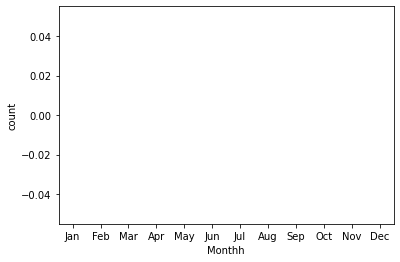

In [ ]:
sns.countplot(x='Monthh', data=df_porcentaje, order = Monthh_order)
plt.show()

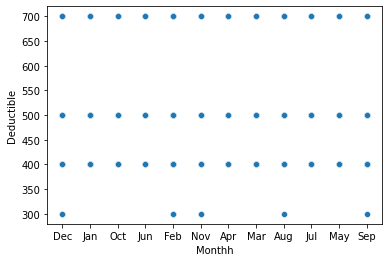

In [ ]:

sns.scatterplot(data=df, x="Monthh", y="Deductible")